In [5]:
pip install plotly==5.24.1

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import plotly.express as px

# Read the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")

# Ensure "Alcohol_Consumption_(CALC)" is categorical for proper visualization
df["Alcohol_Consumption_(CALC)"] = pd.Categorical(
    df["Alcohol_Consumption_(CALC)"], categories=["No", "Sometimes", "Frequently"], ordered=True
)

# Numeric columns for the pair plot
numeric_columns = ["Age", "Height", "Weight", "Main Meals_(NCP)"]

# Create a pair plot using Plotly Express
fig = px.scatter_matrix(
    df,
    dimensions=numeric_columns,
    color="Alcohol_Consumption_(CALC)",
    title="Pair Plot of Numeric Features by Alcohol Consumption",
    labels={"Alcohol_Consumption_(CALC)": "Alcohol Consumption"},
    color_discrete_sequence=px.colors.qualitative.Pastel  # Vibrant colors
)

# Update layout for better aesthetics
fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    height=800,
    width=800,
    legend_title="Alcohol Consumption"
)

fig.show()


     --------------------------------------- 19.1/19.1 MB 16.4 MB/s eta 0:00:00


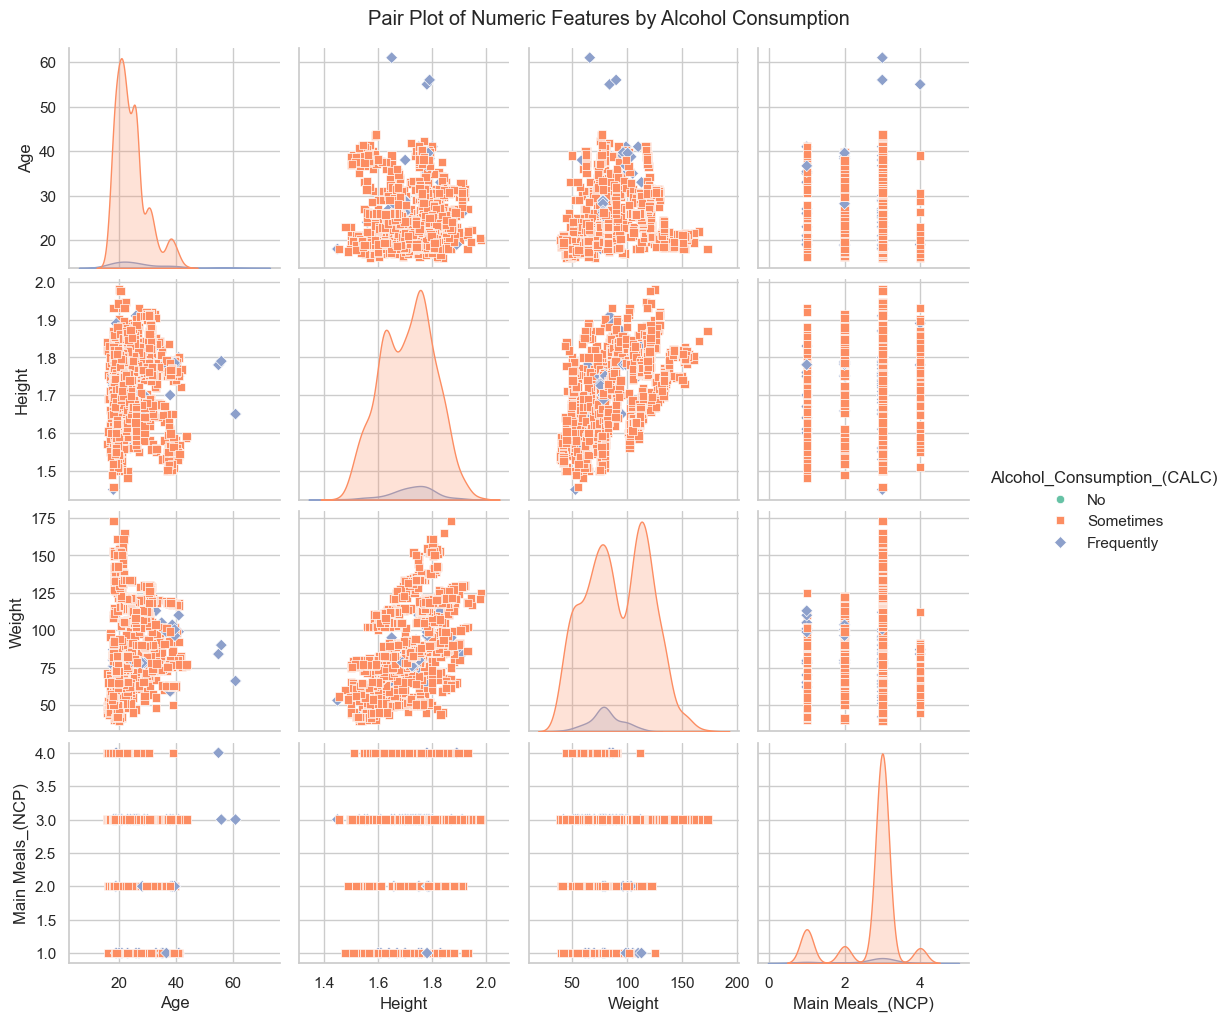

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")

# Ensure "Alcohol_Consumption_(CALC)" is treated as a categorical variable
df["Alcohol_Consumption_(CALC)"] = pd.Categorical(
    df["Alcohol_Consumption_(CALC)"], categories=["No", "Sometimes", "Frequently"], ordered=True
)

# Numeric columns for the pair plot
numeric_columns = ["Age", "Height", "Weight", "Main Meals_(NCP)"]

# Create the pair plot
sns.set(style="whitegrid")
pairplot = sns.pairplot(
    df,
    vars=numeric_columns,
    hue="Alcohol_Consumption_(CALC)",
    palette="Set2",  # Vibrant color palette
    diag_kind="kde",
    markers=["o", "s", "D"]
)

# Adjust plot aesthetics
pairplot.fig.suptitle("Pair Plot of Numeric Features by Alcohol Consumption", y=1.02)
plt.show()


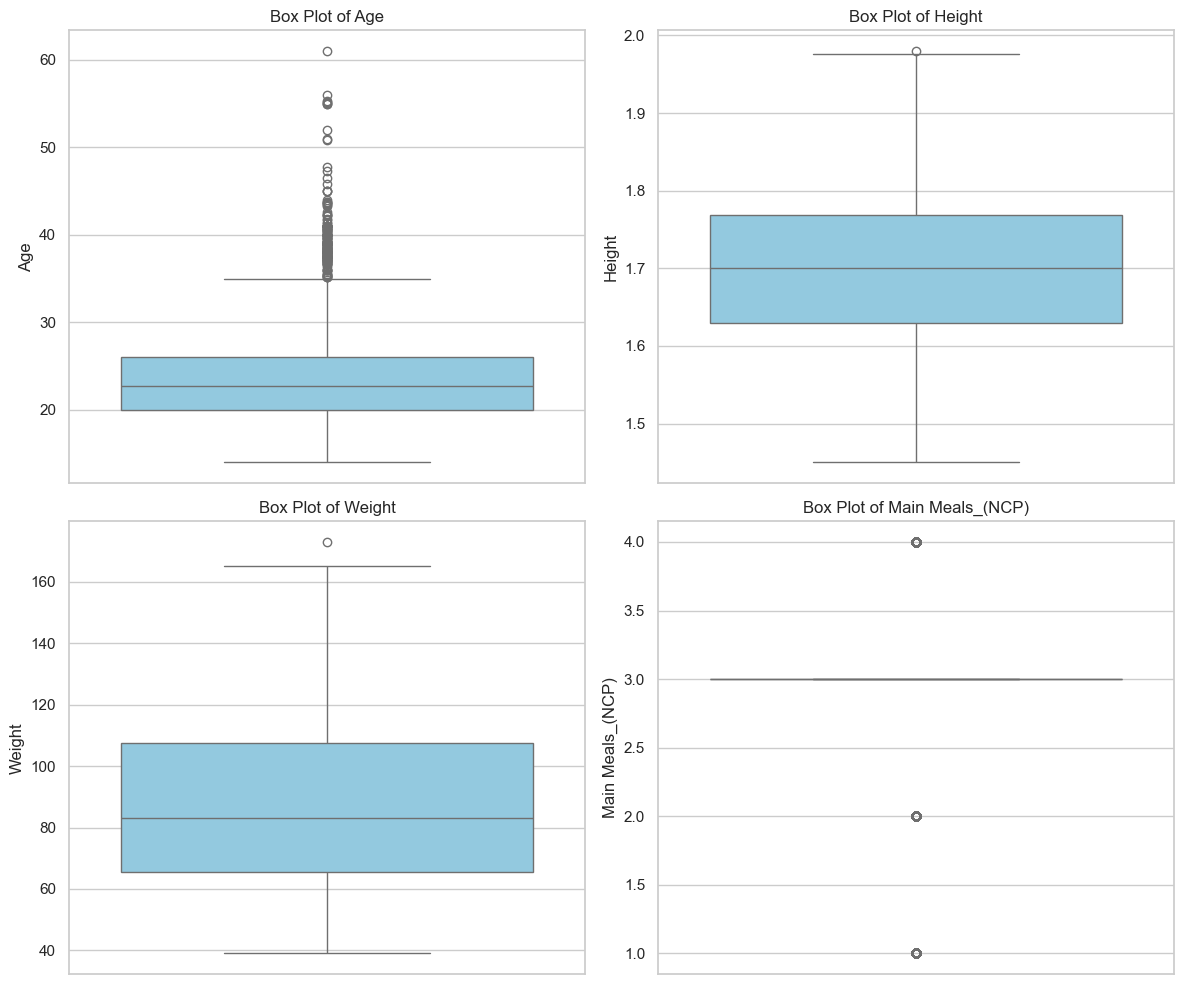

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")

# Numeric columns for the box plot
numeric_columns = ["Age", "Height", "Weight", "Main Meals_(NCP)"]

# Create box plots for each numeric column
sns.set(style="whitegrid", palette="muted")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust grid size based on the number of variables
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(
        y=column,
        data=df,
        ax=axes[i],
        color="skyblue"  # Custom color for the box plots
    )
    axes[i].set_title(f"Box Plot of {column}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import plotly.graph_objects as go

# Example dataset

# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")

# Create count for combinations
counts = df.groupby(["Gender", "family_history", "Smoker"]).size().reset_index(name="count")

# Map categories to indices
categories = list(df["Gender"].unique()) + list(df["family_history"].unique()) + list(df["Smoker"].unique())
category_to_index = {category: idx for idx, category in enumerate(categories)}

# Define the links
sources = counts["Gender"].map(category_to_index)
targets_family = counts["family_history"].map(category_to_index)
targets_smoker = counts["Smoker"].map(category_to_index)

# Source to intermediate (family history)
source = list(sources)
target = list(targets_family)
value = list(counts["count"])

# Intermediate (family history) to target (smoker)
source += list(targets_family)
target += list(targets_smoker)
value += list(counts["count"])

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=categories,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram of Gender, Family History, and Smoking Habits", font_size=10)
fig.show()


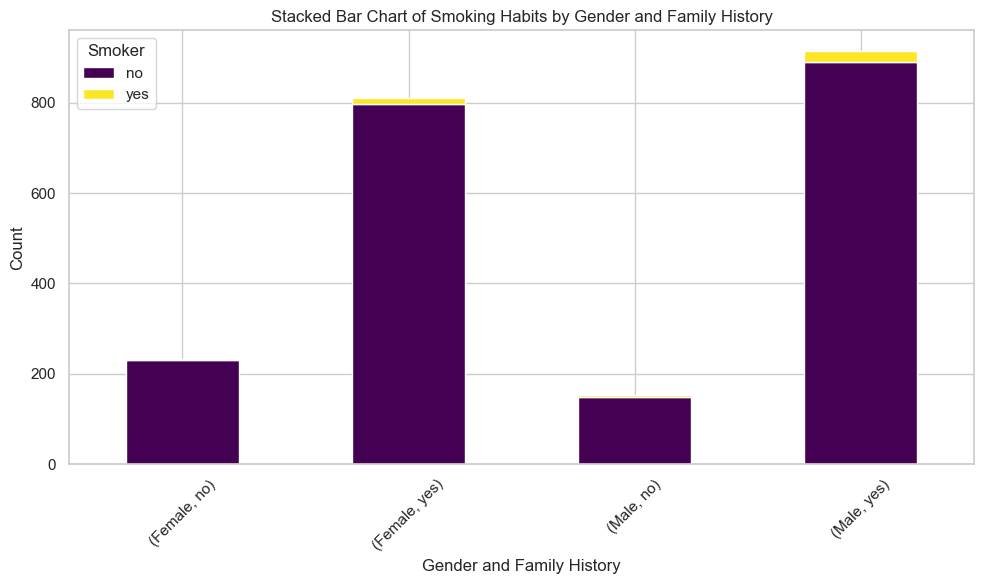

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")

# Create a crosstab for stacked bar
crosstab = pd.crosstab([df["Gender"], df["family_history"]], df["Smoker"])

# Plot
crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Add labels and title
plt.title("Stacked Bar Chart of Smoking Habits by Gender and Family History")
plt.xlabel("Gender and Family History")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


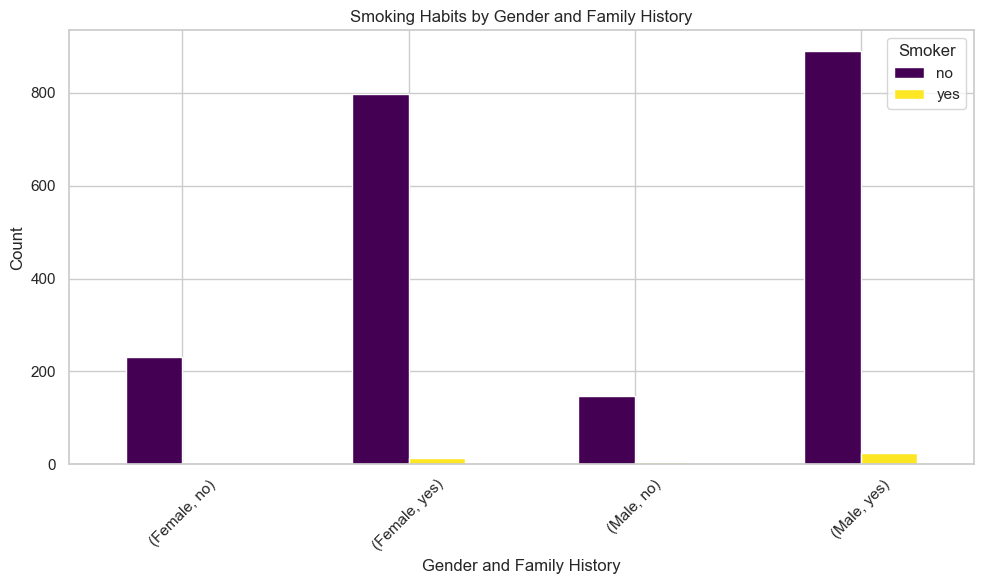

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")


# Crosstab for side-by-side bars
crosstab = pd.crosstab([df["Gender"], df["family_history"]], df["Smoker"])

# Plotting
crosstab.plot(kind='bar', colormap='viridis', figsize=(10, 6))

# Add labels and title
plt.title("Smoking Habits by Gender and Family History")
plt.xlabel("Gender and Family History")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

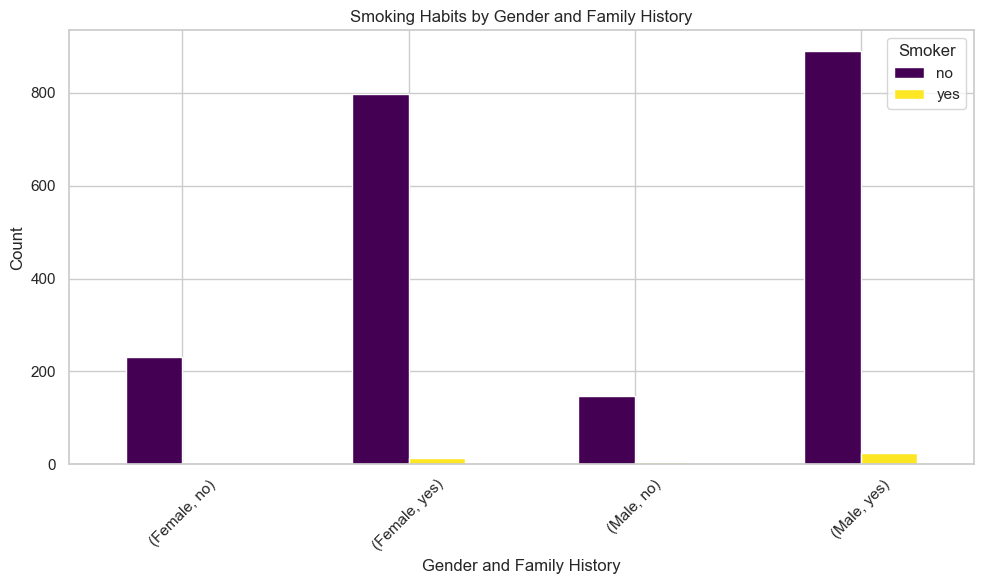

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")


# Crosstab for side-by-side bars
crosstab = pd.crosstab([df["Gender"], df["family_history"]], df["Smoker"])

# Plotting
crosstab.plot(kind='bar', colormap='viridis', figsize=(10, 6))

# Add labels and title
plt.title("Smoking Habits by Gender and Family History")
plt.xlabel("Gender and Family History")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


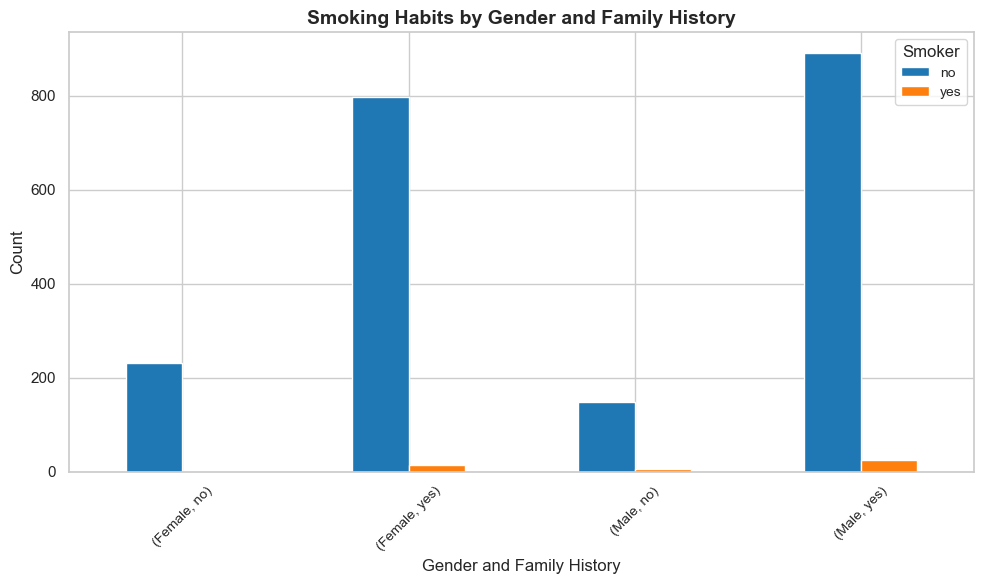

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")

# Crosstab for side-by-side bars
crosstab = pd.crosstab([df["Gender"], df["family_history"]], df["Smoker"])

# Plotting with a new color scheme
crosstab.plot(kind='bar', color=["#1f77b4", "#ff7f0e"], figsize=(10, 6))

# Add labels and title
plt.title("Smoking Habits by Gender and Family History", fontsize=14, fontweight='bold')
plt.xlabel("Gender and Family History", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Smoker", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()


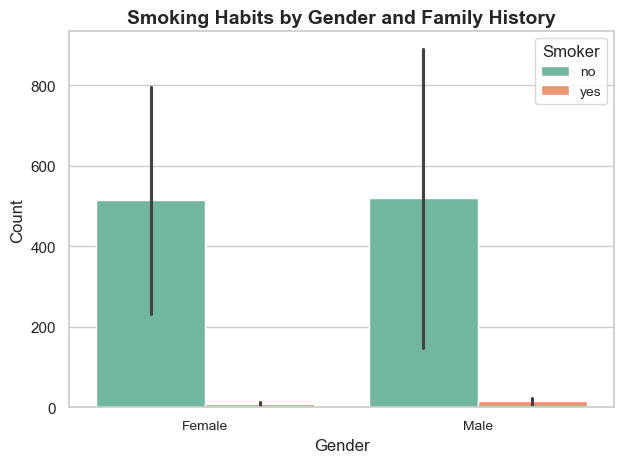

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
# Load the dataset from a CSV file
df = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\Final Dataset CSV\Descriptive Statistics.csv")


# Crosstab for side-by-side bars
crosstab = pd.crosstab([df["Gender"], df["family_history"]], df["Smoker"]).reset_index()

# Melt the dataframe for easier plotting
crosstab_melted = crosstab.melt(id_vars=["Gender", "family_history"], var_name="Smoker", value_name="Count")

# Plot using Seaborn with Set2 palette
sns.barplot(
    data=crosstab_melted, 
    x="Gender", 
    y="Count", 
    hue="Smoker", 
    palette="Set2", 
    dodge=True
)

# Add labels and title
plt.title("Smoking Habits by Gender and Family History", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Smoker", fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()

plt.show()
